<a href="https://colab.research.google.com/github/5234560002ebnida/nonfictioner/blob/main/ANN_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


targetUrl = "https://raw.githubusercontent.com/gundaminpde/2022/main/sonar3.csv"

### Data_set은 옆에 주소에서 가지고 왔어요. https://github.com/gundaminpde/2022/blob/main/sonar3.csv

Data_set = pd.read_csv(targetUrl, sep=',')




## 전체 Data_set의 전체 형태는 어떤가? 207 rows × 61 columns 구나! column은 0, 1, 2, ..., 60까지.
print(Data_set.shape)

## 전체 Data_set의 앞에 5개 어떤 것인가?
Data_set.head()

(207, 61)


,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,0
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0


In [68]:
## 돌과 광물을 특징으로 부터 구분하는 것이다.
## 입력 Data 부분은 0번부터 59번까지의 특징, 정답은 60번에 있다.이제 X와 y로 구분하자.
## 0 과 1이 한개는 암석, 한개는 광물이다. 그런데, 뭐가 무엇인지는 까먹었다.


X = Data_set.iloc[:,0:60]
y = Data_set.iloc[:,60]


In [69]:
X.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 0, dtype: int64

In [77]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=60, batch_size=15)


Epoch 1/60
14/14 [==============================] - 1s 3ms/step - loss: 0.6960 - binary_accuracy: 0.5362
Epoch 2/60
14/14 [==============================] - 0s 3ms/step - loss: 0.6611 - binary_accuracy: 0.6763
Epoch 3/60
14/14 [==============================] - 0s 2ms/step - loss: 0.6484 - binary_accuracy: 0.7053
Epoch 4/60
14/14 [==============================] - 0s 3ms/step - loss: 0.6381 - binary_accuracy: 0.7440
Epoch 5/60
14/14 [==============================] - 0s 3ms/step - loss: 0.6267 - binary_accuracy: 0.7343
Epoch 6/60
14/14 [==============================] - 0s 2ms/step - loss: 0.6167 - binary_accuracy: 0.7391
Epoch 7/60
14/14 [==============================] - 0s 3ms/step - loss: 0.6056 - binary_accuracy: 0.7536
Epoch 8/60
14/14 [==============================] - 0s 3ms/step - loss: 0.5982 - binary_accuracy: 0.7246
Epoch 9/60
14/14 [==============================] - 0s 3ms/step - loss: 0.5827 - binary_accuracy: 0.7391
Epoch 10/60
14/14 [==============================] - 0s

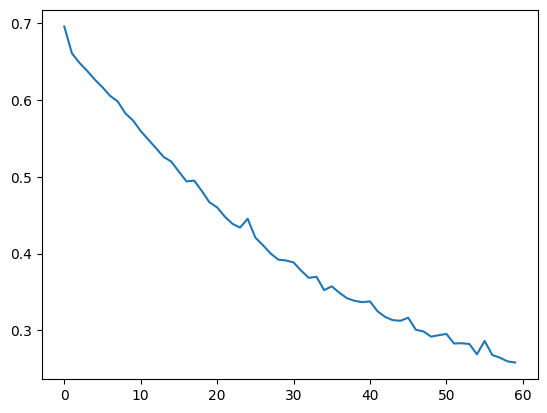

In [78]:
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)